In [1]:
import tensorflow as tf
import os
# 이미지 경로 지정

base_dir = './dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_arr = []
validation_arr = []
for train_license_plate in os.listdir(train_dir):
    train_license_plate = os.path.join(train_dir,train_license_plate)
    #print(train_license_plate)
    train_arr.append(train_license_plate)
#print(test)

for validation_license_plate in os.listdir(validation_dir):
    validation_license_plate = os.path.join(validation_dir,validation_license_plate)
    #print(validation_license_plate)
    validation_arr.append(validation_license_plate)

In [2]:
# 파일 이름과 개수
for i in train_arr:
    print(i)
    train_2207_fnames = os.listdir(i)
    print(train_2207_fnames[:5])

./dataset\train\1067
['1e9cdc79-ad0a-4320-af50-10bb3056bb3b.jpg', '3ea5d72d-5cc3-4dc7-ada3-fb5426c94276.jpg', '41a2502d-a494-4a59-87b7-920d43b6922f.jpg', '47a26a50-f940-4934-94c5-f03028208370.jpg', '6b724689-4ece-4b6f-9e4d-4818a77ae134.jpg']
./dataset\train\1211
['2e5d329f-1322-4ec4-b92a-a4610a190ba0.jpg', '3495c471-76e9-4375-91af-0212cc569927.jpg', '396e57ab-9eef-4058-87e0-34869083d3c1.jpg', '3cabc425-9e56-44bf-9ea5-05f31c8c989b.jpg', '3dc6ee70-a178-4335-b522-ac02828ea9ff.jpg']
./dataset\train\1221
['4b5b7eb7-5b75-45d5-bda5-8f159072928f.jpg', '4bee5dd9-e8c6-46bb-ab8e-1b2127a52d4d.jpg', '78e5d6a2-857c-4b47-90e6-be3f9baebff4.jpg', '8a6b7b47-ead0-4d7d-8f50-3c54082eb71c.jpg', '949a121f-879c-471b-a298-ab143dba67f6.jpg']
./dataset\train\1379
['2eecdde6-d67b-40b8-b27b-36dee2218934.jpg', '3d88ca4e-48d7-4680-a4a6-549ab67ef570.jpg', '489dd07a-0c13-4ee9-8e8c-120758bab75a.jpg', '5e6bd657-60cd-4db9-b58f-929a89ef9151.jpg', '62f7aa8d-ad59-43b2-b482-6e3a012024ec.jpg']
./dataset\train\1426
['6f491a98-

In [2]:
# VGG16 모델 로드
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# VGG16 모델 로드 (include_top=False로 최상위 레이어는 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 모델의 일부 레이어 동결
for layer in base_model.layers:
    layer.trainable = False

# 카테고리 갯수
classes = len(train_arr)
print(classes)

# 커스텀 레이어 추가
model = Sequential([
    base_model,
    Flatten(),
    Dense(classes, activation='softmax')  # num_classes는 클래스 수에 맞게 설정
])

64


In [8]:
# ResNet50 모델 로드
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ResNet50 모델 로드 (include_top=False로 최상위 레이어는 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 모델의 일부 레이어 동결
for layer in base_model.layers:
    layer.trainable = False

# 모델 구성
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(classes, activation='softmax')
])


In [3]:
# 모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',  # 다중 분류에 적합한 손실 함수
              metrics=['accuracy'])  # 정확도는 여전히 평가 지표로 사용됨


In [4]:
# 데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=2,         # 회전 각도 범위 설정
    width_shift_range=0.05,     # 가로 이동 범위 설정
    height_shift_range=0.05,    # 세로 이동 범위 설정
    shear_range=0.05,           # 전단 강도 범위 설정
    zoom_range=0.05,            # 확대/축소 범위 설정
    #horizontal_flip=True,      # 수평 반전 여부
    fill_mode='nearest'        # 새로운 픽셀 채우는 방식
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.
)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32,
                                                    class_mode='categorical', target_size=(150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=32,
                                                        class_mode='categorical', target_size=(150, 150))


Found 30438 images belonging to 64 classes.
Found 7578 images belonging to 64 classes.


In [3]:
# 데이터 증강 이미지 저장

from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 원본 이미지 디렉토리 경로
original_image_dir = './dataset/train/'

# 데이터 증강된 이미지를 저장할 디렉토리 경로
augmented_image_dir = './dataset/datagen/'

read_folder = os.listdir(original_image_dir)

# 데이터 증강 작업을 수행할 횟수
num_augmented_images = 10

# ImageDataGenerator 설정
datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=2,         # 회전 각도 범위 설정
    width_shift_range=0.07,    # 가로 이동 범위 설정
    height_shift_range=0.07,   # 세로 이동 범위 설정
    shear_range=0.07,          # 전단 강도 범위 설정
    zoom_range=0.07,           # 확대/축소 범위 설정
    #horizontal_flip=True,     # 수평 반전 여부
    fill_mode='nearest'       # 새로운 픽셀 채우는 방식
)

for test in read_folder:
    original_image_path = os.path.join(original_image_dir, test)
    
    # 원본 이미지 파일 목록
    original_image_files = os.listdir(original_image_path)
    
    # 데이터 증강 작업을 수행하고 저장하는 반복문
    for original_image_file in original_image_files:
        
        # 원본 이미지를 불러옴
        original_img_file = os.path.join(original_image_path, original_image_file)
        #print(original_img_file)
        original_image = Image.open(original_img_file)
        original_image = np.array(original_image)

        # 데이터 증강 작업을 수행하고 이미지를 생성
        augmented_images = []
        for i in range(num_augmented_images):
            augmented_image = datagen.random_transform(original_image)
            augmented_images.append(augmented_image)

        # 생성된 이미지를 저장
        base_filename, _ = os.path.splitext(original_image_file)
        for i, augmented_image in enumerate(augmented_images):
            augmented_image_path = os.path.join(augmented_image_dir, test)
            if not os.path.exists(augmented_image_path):
                os.makedirs(augmented_image_path)
            print(augmented_image_path)
            saved_image = os.path.join(augmented_image_path, f'{base_filename}_aug_{i}.jpg')
            augmented_image = Image.fromarray(augmented_image)
            augmented_image.save(saved_image)

    print(f'{len(original_image_files)}개의 원본 이미지에서 {num_augmented_images}개의 데이터 증강 이미지를 각각 저장했습니다.')


./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/datagen/1067
./dataset/d

In [5]:
# 모델 훈련하기
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch=10, epochs=50,
                    validation_steps=10, verbose=1)

# 가중치 저장
model.save('test5.h5')

Epoch 1/50
10/10 [==============================] - 19s 2s/step - loss: 4.8257 - accuracy: 0.0469 - val_loss: 3.8056 - val_accuracy: 0.1125
Epoch 2/50
10/10 [==============================] - 18s 2s/step - loss: 3.5658 - accuracy: 0.1531 - val_loss: 3.2524 - val_accuracy: 0.2250
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 3.2181 - accuracy: 0.2344 - val_loss: 3.0702 - val_accuracy: 0.2688
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 2.8025 - accuracy: 0.3281 - val_loss: 2.9004 - val_accuracy: 0.2625
Epoch 5/50
10/10 [==============================] - 18s 2s/step - loss: 2.5796 - accuracy: 0.4062 - val_loss: 2.6052 - val_accuracy: 0.3531
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 2.2999 - accuracy: 0.4625 - val_loss: 2.1949 - val_accuracy: 0.4469
Epoch 7/50
10/10 [==============================] - 18s 2s/step - loss: 2.1966 - accuracy: 0.4594 - val_loss: 2.1101 - val_accuracy: 0.4719
Epoch 8/50
10/10 [==

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


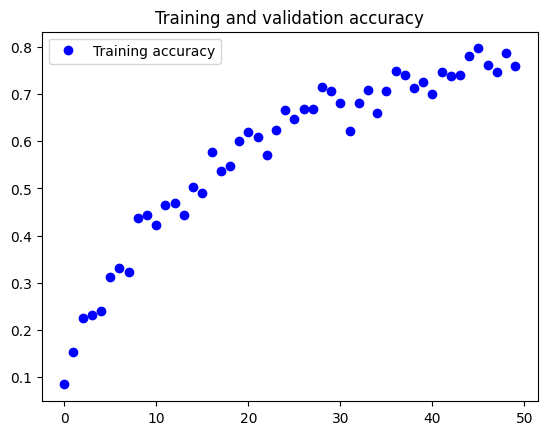

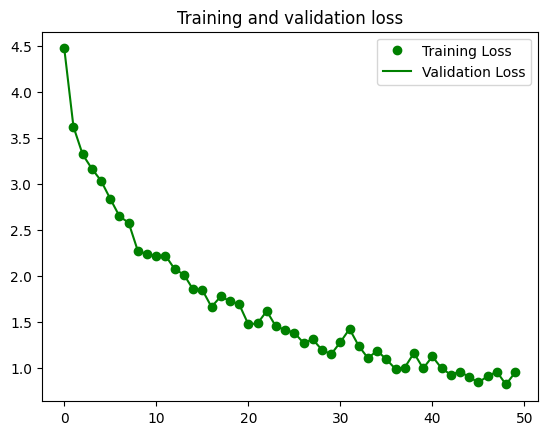

In [6]:
# 1차 정확도와 손실 확인

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label = 'Training Loss')
plt.plot(epochs, loss, 'g', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

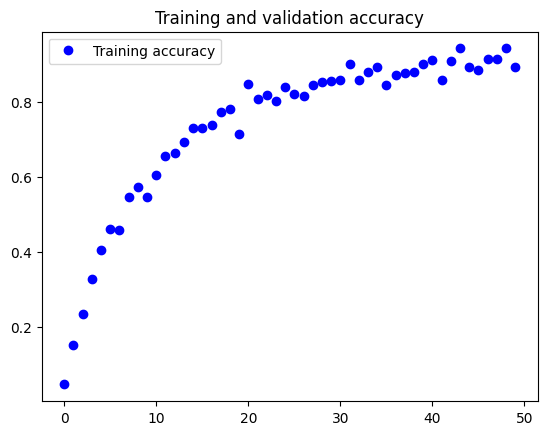

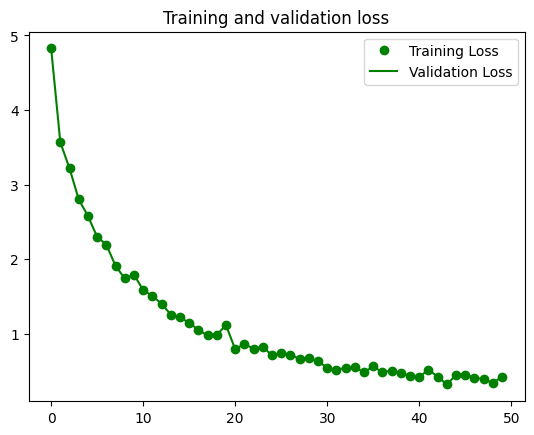

In [6]:
# 2차 정확도와 손실 확인

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label = 'Training Loss')
plt.plot(epochs, loss, 'g', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from keras.preprocessing import image
import numpy as np

# 이미지 경로 설정
path = './dataset/test/test14.jpg'

# 이미지 로드 및 크기 조정
img = image.load_img(path, target_size=(150, 150))

# 이미지 배열로 변환 및 차원 확장
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# 이미지 데이터 정규화
x = x / 255.0

# 모델로 예측 수행
predictions = model.predict(x)[0]  # 첫 번째 이미지에 대한 예측 결과

# 클래스 이름 설정 (클래스 이름 리스트가 있다면 해당 리스트 사용)
class_names = []
for i in train_arr:
    class_names.append(i[-4:])
#class_names = ['CassFresh', 'budweiser', 'filite', 'hineken', 'jinro']  # 예시 클래스 이름
print(len(class_names))

# 확률이 높은 상위 3개 클래스 출력
top_classes_indices = np.argsort(predictions)[::-1][:3]  # 상위 3개 클래스의 인덱스
for i, class_index in enumerate(top_classes_indices):
    class_name = class_names[class_index]
    confidence = predictions[class_index] * 100
    print(f'Rank {i+1}: Predicted class: {class_name}, Confidence: {confidence:.2f}%')


1/1 [==============================] - 0s 64ms/step
64
Rank 1: Predicted class: 5027, Confidence: 76.85%
Rank 2: Predicted class: 8941, Confidence: 5.11%
Rank 3: Predicted class: 2207, Confidence: 4.92%
